## Imports

In [2]:
## Imports
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Problem Statement

Problem Statement: Revised initial goals & success criteria: 
Using real-world dataset for spatio-temporal electric vehicle (EV) charging demand prediction, what is the forecasted number of EV vehicles in the next 30 minutes? 

## Methods and Models

Outline of proposed methods and models: KNN, VAR, CNN

Risks & assumptions of your data:

# Source of Data

Data source: https://github.com/IntelligentSystemsLab/ST-EVCDP/tree/main

## EDA

In [10]:
# read csv
df = pd.read_csv('./data/duration.csv')
price = pd.read_csv('./data/e_price.csv')
inf = pd.read_csv('./data/inf.csv')
occ = pd.read_csv('./data/occupancy.csv')
s_price = pd.read_csv('./data/s_price.csv')
vol = pd.read_csv('./data/volume.csv')
weather_airport = pd.read_csv('./data/weather_airport.csv')
weather_central = pd.read_csv('./data/weather_central.csv')
information = pd.read_csv('./data/information.csv')

In [11]:
df.head() #which uses which grid number??

,time,1001,1002,1003,1004,1005,1006,1007,1008,1009,...,2673,2674,2675,2676,2677,2678,2679,2680,2681,2682
0,2022-09-01 00:00:00,0.0000,0.1667,0.0833,0.0000,0.0000,0.5000,0.0000,0.1667,0.0000,...,0.7500,0.1667,0.0,0.4167,0.3333,0.0833,0.2500,0.0833,0.1667,0.0000
1,2022-09-01 01:00:00,0.0000,0.1667,0.0833,0.0000,0.0000,0.5833,0.0000,0.1667,3.8333,...,0.7500,0.1667,0.0,0.5000,0.4167,0.0833,0.2500,0.0833,0.1667,0.0000
2,2022-09-01 02:00:00,0.0833,0.0000,0.0000,0.3333,0.9167,0.6667,0.0000,0.3333,4.8333,...,1.4167,0.0833,0.0,0.4167,0.6667,0.1667,0.4167,0.0833,0.0000,0.0020
3,2022-09-01 03:00:00,0.0833,0.0000,0.0000,0.3333,0.2082,0.6667,0.5329,0.3333,4.6667,...,1.4167,0.0833,0.0,0.4167,0.6667,0.0833,0.4167,0.0833,0.0000,0.0006
4,2022-09-01 04:00:00,0.0000,0.1667,0.0833,0.1667,0.9167,0.5833,0.0000,0.1667,4.4167,...,0.7500,0.1667,0.0,0.4167,0.4167,0.0000,0.2500,0.0833,0.0833,0.0011


In [12]:
df.shape

(8760, 1683)

In [13]:
price = pd.read_csv('./data/e_price.csv')

In [14]:
price.head()

,time,1001,1002,1003,1004,1005,1006,1007,1008,1009,...,2673,2674,2675,2676,2677,2678,2679,2680,2681,2682
0,2022-09-01 00:00:00,1.2,1.0,1.1,0.32,0.6015,0.2962,0.3041,1.0,0.3067,...,0.7,0.34,0.35,0.72,0.72,0.0,0.72,0.72,1.0,1.05
1,2022-09-01 01:00:00,1.2,1.0,1.1,0.32,0.3314,0.2962,0.3015,1.0,0.3067,...,0.7,0.34,0.35,0.72,0.72,0.0,0.72,0.72,1.0,1.05
2,2022-09-01 02:00:00,1.2,1.0,1.1,0.32,0.3200,0.2962,0.2990,1.0,0.3067,...,0.7,0.34,0.35,0.72,0.72,0.0,0.72,0.72,1.0,1.05
3,2022-09-01 03:00:00,1.2,1.0,1.1,0.32,0.3200,0.2962,0.2990,1.0,0.3067,...,0.7,0.34,0.35,0.72,0.72,0.0,0.72,0.72,1.0,1.05
4,2022-09-01 04:00:00,1.2,1.0,1.1,0.32,0.3200,0.2962,0.2990,1.0,0.3067,...,0.7,0.34,0.35,0.72,0.72,0.0,0.72,0.72,1.0,1.05


In [15]:
price.shape

(8760, 1683)

In [16]:
price.describe().round(2)

,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,...,2673,2674,2675,2676,2677,2678,2679,2680,2681,2682
count,8760.0,8760.0,8760.0,8760.00,8760.00,8760.00,8760.00,8760.0,8760.00,8760.00,...,8760.0,8760.00,8760.00,8760.00,8760.00,8760.0,8760.00,8760.00,8760.0,8760.00
mean,1.2,1.0,1.1,0.74,0.74,0.71,0.70,1.0,0.70,0.65,...,0.7,0.77,0.65,0.72,0.72,0.0,0.72,0.72,1.0,1.05
std,0.0,0.0,0.0,0.33,0.33,0.32,0.31,0.0,0.33,0.33,...,0.0,0.26,0.24,0.00,0.00,0.0,0.00,0.00,0.0,0.00
min,1.2,1.0,1.1,0.32,0.32,0.30,0.30,1.0,0.24,0.24,...,0.7,0.34,0.35,0.72,0.72,0.0,0.72,0.72,1.0,1.05
25%,1.2,1.0,1.1,0.32,0.32,0.30,0.30,1.0,0.31,0.24,...,0.7,0.44,0.35,0.72,0.72,0.0,0.72,0.72,1.0,1.05
50%,1.2,1.0,1.1,0.79,0.79,0.74,0.74,1.0,0.74,0.70,...,0.7,0.77,0.65,0.72,0.72,0.0,0.72,0.72,1.0,1.05
75%,1.2,1.0,1.1,1.05,1.10,1.09,1.09,1.0,1.05,1.02,...,0.7,1.06,0.95,0.72,0.72,0.0,0.72,0.72,1.0,1.05
max,1.2,1.0,1.1,1.40,1.40,1.09,1.09,1.0,1.41,1.31,...,0.7,1.13,0.95,0.72,0.72,0.0,0.72,0.72,1.0,1.05


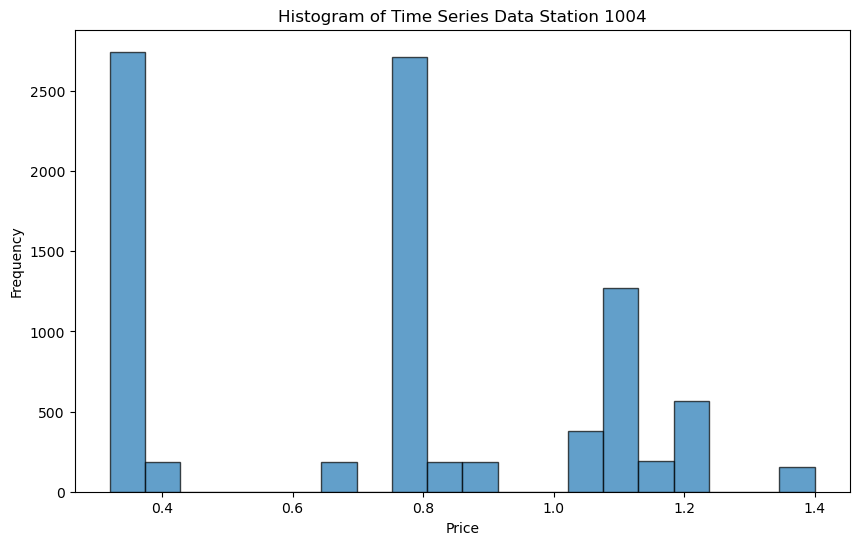

In [17]:
# Create a histogram of the 'Value' column 
plt.figure(figsize=(10, 6)) 
plt.hist(price['1004'], bins=20, edgecolor='black', alpha=0.7) 
plt.xlabel('Price') 
plt.ylabel('Frequency') 
plt.title('Histogram of Time Series Data Station 1004')
plt.show() #price

In [18]:
count_varied_e_price = price.apply(lambda x: len(x.unique()) > 1).sum()
count_varied_e_price # 391/1683 columns

391

In [19]:
varied_columns = price.columns[price.apply(lambda x: len(x.unique()) > 1)] 
print("Columns with varied numbers:") 
print(varied_columns.tolist())

Columns with varied numbers:
['time', '1004', '1005', '1006', '1007', '1009', '1010', '1011', '1012', '1020', '1021', '1022', '1023', '1024', '1025', '1026', '1027', '1028', '1029', '1030', '1035', '1036', '1037', '1045', '1046', '1050', '1053', '1057', '1059', '1061', '1069', '1070', '1075', '1076', '1077', '1078', '1079', '1083', '1086', '1087', '1090', '1091', '1092', '1093', '1094', '1096', '1101', '1106', '1107', '1109', '1110', '1112', '1113', '1114', '1117', '1118', '1119', '1121', '1133', '1135', '1138', '1145', '1148', '1149', '1150', '1155', '1156', '1157', '1158', '1159', '1162', '1173', '1179', '1181', '1183', '1188', '1189', '1190', '1191', '1197', '1200', '1206', '1208', '1210', '1212', '1213', '1214', '1215', '1217', '1218', '1221', '1223', '1224', '1229', '1231', '1232', '1233', '1238', '1239', '1242', '1246', '1248', '1251', '1261', '1263', '1266', '1267', '1268', '1269', '1274', '1287', '1295', '1296', '1300', '1301', '1303', '1306', '1307', '1318', '1319', '1321', '1

In [20]:
varied_columns.dtype

dtype('O')

In [21]:
varied_columns = varied_columns[1:] #exclude the first col 'time'

In [22]:
df_varied_price = price.loc[:, varied_columns]

In [23]:
# filter for the varied dynamic prices only. Average exchange rate in 2022: 5.2011 THB per yuan

In [24]:
df_varied_price.head()

,1004,1005,1006,1007,1009,1010,1011,1012,1020,1021,...,2651,2653,2654,2662,2663,2664,2667,2668,2674,2675
0,0.32,0.6015,0.2962,0.3041,0.3067,0.5356,0.3067,0.5437,0.8787,0.6998,...,0.24,0.26,0.4333,1.2,0.2381,0.5571,0.3,0.26,0.34,0.35
1,0.32,0.3314,0.2962,0.3015,0.3067,0.2412,0.3067,0.2438,0.8787,0.6998,...,0.24,0.26,0.2935,1.2,0.2381,0.5571,0.3,0.26,0.34,0.35
2,0.32,0.3200,0.2962,0.2990,0.3067,0.2411,0.3067,0.2411,0.8788,0.6998,...,0.24,0.26,0.2935,1.2,0.2381,0.4000,0.3,0.26,0.34,0.35
3,0.32,0.3200,0.2962,0.2990,0.3067,0.2411,0.3067,0.2411,0.8788,0.6998,...,0.24,0.26,0.2936,1.2,0.2381,0.4000,0.3,0.26,0.34,0.35
4,0.32,0.3200,0.2962,0.2990,0.3067,0.2411,0.3067,0.2412,0.8788,0.6998,...,0.24,0.26,0.2934,1.2,0.2381,0.4000,0.3,0.26,0.34,0.35


In [25]:
df_varied_price['1004'].nunique()

15

In [26]:
df_varied_price['2654'].nunique()

26

In [27]:
df_varied_price['2409'].nunique()

12

In [47]:
inf.head(10)

,station_id,longitude,latitude,pile_count
0,1001,113.784724,22.714121,20
1,1002,113.785002,22.725900,22
2,1003,113.787971,22.735538,6
3,1004,113.788126,22.693449,11
4,1005,113.788126,22.693449,11
5,1006,113.790987,22.731351,10
6,1007,113.790987,22.731351,10
7,1008,113.791756,22.698816,44
8,1009,113.794798,22.716747,72
9,1010,113.794798,22.716747,72


In [37]:
inf.shape

(1682, 4)

In [49]:
# which station has the highest pile_count?
inf.sort_values(by='pile_count', ascending=False) #station 2387 with lat long = 22.566156, 114.182327	

,station_id,longitude,latitude,pile_count
1386,2387,114.182327,22.566156,108
995,1996,114.069259,22.688085,106
1070,2071,114.101209,22.625045,102
481,1482,113.950235,22.520467,99
76,1077,113.838491,22.605773,98
...,...,...,...,...
100,1101,113.850125,22.564051,1
997,1998,114.069997,22.614995,1
836,1837,114.049625,22.518818,1
350,1351,113.921713,22.527513,1


In [38]:
occ.head()

,time,1001,1002,1003,1004,1005,1006,1007,1008,1009,...,2673,2674,2675,2676,2677,2678,2679,2680,2681,2682
0,2022-09-01 00:00:00,4.0,9.0,2.0,10.0,7.0,4.0,4.0,20.0,36.0,...,16.0,1.0,4.0,5.0,6.0,0.0,4.0,2.0,2.0,0.0
1,2022-09-01 01:00:00,7.0,6.0,2.0,6.0,8.0,7.0,5.0,19.0,47.0,...,25.0,2.0,10.0,6.0,7.0,0.0,3.0,3.0,3.0,4.0
2,2022-09-01 02:00:00,7.0,3.0,1.0,10.0,8.0,8.0,5.0,20.0,60.0,...,17.0,1.0,0.0,5.0,8.0,0.0,7.0,3.0,1.0,8.0
3,2022-09-01 03:00:00,8.0,3.0,1.0,10.0,9.0,8.0,5.0,20.0,58.0,...,17.0,1.0,10.0,5.0,8.0,1.0,7.0,3.0,1.0,3.0
4,2022-09-01 04:00:00,6.0,6.0,2.0,8.0,9.0,7.0,5.0,19.0,54.0,...,25.0,2.0,10.0,5.0,7.0,0.0,3.0,3.0,2.0,0.0


In [39]:
occ.describe()

,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,...,2673,2674,2675,2676,2677,2678,2679,2680,2681,2682
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,...,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,3.373858,10.731279,0.361644,5.999087,5.964498,4.208790,4.100571,23.678539,26.730708,28.424201,...,8.566324,1.871119,2.688699,4.271689,4.713470,1.791667,3.319863,1.966324,1.657306,1.013813
std,5.192522,7.378590,0.708302,2.297489,2.648834,4.133257,2.452573,7.252219,15.338424,15.840092,...,4.506005,1.256175,21.142070,2.704653,3.046483,3.052959,2.035246,4.743796,1.825885,2.246366
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,7.000000,0.000000,4.000000,4.000000,2.000000,2.000000,19.000000,17.000000,20.000000,...,5.000000,1.000000,0.000000,2.000000,3.000000,0.000000,2.000000,0.000000,1.000000,0.000000
50%,0.000000,10.000000,0.000000,6.000000,6.000000,4.000000,4.000000,23.000000,24.000000,27.000000,...,8.000000,2.000000,1.000000,4.000000,4.000000,1.000000,3.000000,1.000000,1.000000,0.000000
75%,6.000000,13.000000,1.000000,7.000000,7.000000,6.000000,6.000000,28.000000,37.000000,35.000000,...,11.000000,2.000000,3.000000,6.000000,7.000000,2.000000,5.000000,3.000000,2.000000,1.000000
max,20.000000,352.000000,6.000000,35.000000,96.000000,152.000000,21.000000,51.000000,434.000000,368.000000,...,36.000000,24.000000,1872.000000,50.000000,49.000000,61.000000,15.000000,363.000000,10.000000,48.000000


In [40]:
s_price.head() #srvice station price

,time,1001,1002,1003,1004,1005,1006,1007,1008,1009,...,2673,2674,2675,2676,2677,2678,2679,2680,2681,2682
0,2022-09-01 00:00:00,0.47,0.66,0.76,0.76,0.4851,1.1438,1.0908,0.66,0.8733,...,0.76,0.82,0.73,0.76,0.76,0.4530,0.76,0.76,0.52,0.7
1,2022-09-01 01:00:00,0.47,0.66,0.76,0.76,0.7552,1.1438,1.2405,0.66,0.8733,...,0.76,0.82,0.73,0.76,0.76,0.4522,0.76,0.76,0.52,0.7
2,2022-09-01 02:00:00,0.47,0.66,0.76,0.76,0.7660,1.1438,1.2410,0.66,0.8733,...,0.76,0.82,0.73,0.76,0.76,0.4524,0.76,0.76,0.52,0.7
3,2022-09-01 03:00:00,0.47,0.66,0.76,0.76,0.7668,1.1438,1.2410,0.66,0.8733,...,0.76,0.82,0.73,0.76,0.76,0.4523,0.76,0.76,0.52,0.7
4,2022-09-01 04:00:00,0.47,0.66,0.76,0.76,0.7667,1.1438,1.2410,0.66,0.8733,...,0.76,0.82,0.73,0.76,0.76,0.4531,0.76,0.76,0.52,0.7


In [41]:
vol.head()

,time,1001,1002,1003,1004,1005,1006,1007,1008,1009,...,2673,2674,2675,2676,2677,2678,2679,2680,2681,2682
0,2022-09-01 00:00:00,0.0000,1.1667,0.5833,0.0000,6.6108,3.5000,3.2141,1.1667,0.0,...,5.2500,15.0,0.0,2.9167,2.3333,0.5833,1.7500,0.5833,1.1667,0.0
1,2022-09-01 01:00:00,0.0000,1.1667,0.5833,0.0000,9.1765,4.0833,3.6216,1.1667,572.5,...,5.2500,15.0,0.0,3.5000,2.9167,0.5833,1.7500,0.5833,1.1667,0.0
2,2022-09-01 02:00:00,0.5833,0.0000,0.0000,6.7500,7.8682,4.6667,3.7150,2.3333,722.5,...,9.9167,7.5,0.0,2.9167,4.6667,1.1667,2.9167,0.5833,0.0000,0.0
3,2022-09-01 03:00:00,0.5833,0.0000,0.0000,6.7500,9.3332,4.6667,3.7248,2.3333,697.5,...,9.9167,7.5,0.0,2.9167,4.6667,0.5833,2.9167,0.5833,0.0000,0.0
4,2022-09-01 04:00:00,0.0000,1.1667,0.5833,5.5833,11.5353,4.0833,3.7273,1.1667,660.0,...,5.2500,15.0,0.0,2.9167,2.9167,0.0000,1.7500,0.5833,0.5833,0.0


In [42]:
weather_airport.head()

,Local time in Shenzhen Bao'an (airport),T,P0,P,U,DD,Ff,ff10,WW,W'W',nRAIN,c,VV,Td
0,31.08.2023 23:00,28.0,752.0,752.3,74,Wind blowing from the north,5,NaN,NaN,NaN,0,No Significant Clouds,10.0 and more,23.0
1,31.08.2023 22:00,28.0,752.0,752.3,74,Wind blowing from the north,4,NaN,NaN,NaN,0,Few clouds (10-30%) 1500 m,10.0 and more,23.0
2,31.08.2023 21:00,28.0,752.0,752.3,84,Wind blowing from the north-northwest,2,NaN,NaN,NaN,0,Scattered clouds (40-50%) 1500 m,10.0 and more,25.0
3,31.08.2023 20:00,28.0,752.0,752.3,89,Wind blowing from the north-east,1,NaN,NaN,NaN,0,"Few clouds (10-30%) 450 m, broken clouds (60-9...",10.0 and more,26.0
4,31.08.2023 19:00,27.0,752.0,752.3,94,Wind blowing from the east-northeast,5,NaN,"Heavy shower(s), rain",NaN,3,"Few clouds (10-30%) 450 m, few clouds (10-30%)...",4,26.0


In [43]:
weather_central.head()

,Local time in Shenzhen,T,Po,P,U,DD,Ff,ff10,WW,nRAIN,VV,Td,Unnamed: 12,Unnamed: 13
0,31.08.2023 23:00,27.9,747.3,752.8,73,Wind blowing from the north,3,NaN,Cloud development not observed or not observab...,0,30.0,22.6,NaN,NaN
1,31.08.2023 20:00,29.2,746.8,752.3,72,Wind blowing from the north,2,NaN,Cloud development not observed or not observab...,0,30.0,23.6,NaN,NaN
2,31.08.2023 17:00,29.6,745.9,751.4,72,Wind blowing from the north,2,NaN,Cloud development not observed or not observab...,0,30.0,24.0,NaN,NaN
3,31.08.2023 14:00,29.3,746.8,752.3,73,Wind blowing from the north,3,NaN,Cloud development not observed or not observab...,0,30.0,23.9,NaN,NaN
4,31.08.2023 11:00,27.9,747.9,753.4,74,Wind blowing from the north,2,NaN,Cloud development not observed or not observab...,0,30.0,22.8,NaN,NaN


In [97]:
weather_central['WW'].unique()

array(['Cloud development not observed or not observable. ', ' ',
       'Rain (not freezing) not falling as shower(s). ',
       'Rain, not freezing, intermittent, slight at time of observation. ',
       'Rain, not freezing, intermittent, heavy at time of observation. ',
       'Rain, not freezing, intermittent, moderate at time of observation. ',
       'Mist. ',
       'Drizzle (not freezing) or snow grains not falling as shower(s). ',
       'Drizzle, not freezing, intermittent, heavy (dense) at time of observation. ',
       'Drizzle, not freezing, intermittent, slight at time of observation. '],
      dtype=object)

In [44]:
information.head()

,num,grid,count,fast_count,slow_count,area,lon,la,CBD,dynamic_pricing
0,1,102,30,3,27,0.71,114.1030,22.54041,0,0
1,3,105,93,0,93,0.77,114.1208,22.55127,0,0
2,5,107,88,2,86,0.89,114.1304,22.54486,0,0
3,6,108,39,0,39,1.26,114.1315,22.55403,0,0
4,7,109,39,0,39,3.15,114.1430,22.56388,0,0


In [45]:
information.shape

(247, 10)

In [79]:
information[information['dynamic_pricing'] == 0] #190 are not dynamically priced. Thus, I will 

num                190
grid               190
count              190
fast_count         190
slow_count         190
area               190
lon                190
la                 190
CBD                190
dynamic_pricing    190
dtype: int64

In [83]:
information.nunique()

num                247
grid               247
count              127
fast_count          45
slow_count         114
area               204
lon                240
la                 246
CBD                  2
dynamic_pricing      2
dtype: int64

In [85]:
information['grid'].unique() # There are 247 grids (nodes) / traffic zones?? , the grid number is 3 digits or 4 digits and which station does it correspond to?

array([ 102,  105,  107,  108,  109,  110,  111,  115,  123,  124,  202,
        204,  205,  206,  208,  215,  216,  217,  223,  224,  225,  226,
        227,  235,  307,  309,  320,  322,  323,  324,  325,  326,  328,
        329,  330,  331,  332,  333,  335,  340,  343,  346,  347,  348,
        406,  408,  501,  502,  506,  512,  513,  519,  520,  522,  525,
        526,  527,  529,  552,  570,  576,  577,  580,  584,  585,  587,
        588,  589,  594,  595,  596,  598,  627,  628,  630,  631,  632,
        633,  636,  638,  643,  644,  655,  656,  681,  682,  686,  690,
        691,  693,  698,  699,  700,  701,  702,  703,  704,  705,  706,
        708,  709,  710,  711,  712,  715,  716,  719,  724,  728,  729,
        732,  733,  735,  737,  739,  741,  744,  745,  746,  751,  771,
        773,  775,  781,  783,  784,  790,  795,  799,  802,  804,  831,
        832,  835,  842,  848,  849,  851,  852,  855,  858,  862,  883,
        887,  888,  890,  891,  893,  895,  897,  9

In [ ]:
# out of 247 nodes, 47 are dynamic pricing. 

#there are 9 districts, 74 subdistricts in SC. The traffic zones are derived from the POI (point of interest such as malls, tourist spots), mobile check-ins, and social media check-in densities from another paper, 
#thus it is not the subdistrict number. 

In [87]:
time = pd.read_csv('data/time.csv')
time.head()

,month,day,year,hour,minute,second
0,6,19,2022,0,0,0
1,6,19,2022,0,5,0
2,6,19,2022,0,10,0
3,6,19,2022,0,15,0
4,6,19,2022,0,20,0


In [89]:
distance = pd.read_csv('data/distance.csv')
distance.head()

,Unnamed: 0,102,105,107,108,109,110,111,115,123,...,1160,1162,1163,1164,1166,1167,1168,1170,1172,1173
0,0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,0.000000,1.216116,1.142223,0.000000,0.000000,1.563217,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0.0,1.216116,0.000000,1.021749,0.000000,1.415775,0.000000,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,0.0,1.142223,1.021749,0.000000,1.608976,1.342053,1.146887,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,0.0,0.000000,0.000000,1.608976,0.000000,1.641651,1.563329,0.0,2.12913,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [91]:
adj = pd.read_csv('data/adj.csv')
adj.head()

,node_id,102,105,107,108,109,110,111,115,123,...,1160,1162,1163,1164,1166,1167,1168,1170,1172,1173
0,102,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,105,0,1,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,107,0,1,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,108,0,1,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,109,0,0,0,1,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
